In [10]:
img = Image.open(IMG_PATH)

In [11]:
img = np.array(img)

In [14]:
mean_per_channel = np.mean(img, axis=(0, 1))
std_per_channel = np.std(img, axis=(0, 1))

In [16]:
img.shape

(356, 626, 3)

In [ ]:
import numpy as np
import torch
from torchvision import transforms

In [15]:


# Assuming img is a NumPy array with shape (H, W, C)
img_scaled = img / 255.0  # Scale pixel values to [0, 1]
mean_per_channel = np.mean(img_scaled, axis=(0, 1))
std_per_channel = np.std(img_scaled, axis=(0, 1))

# Convert to tensor
img_tensor = transforms.ToTensor()(img)  # Shape: (C, H, W)

# Normalize
normalize = transforms.Normalize(mean=mean_per_channel.tolist(), std=std_per_channel.tolist())
normalized_img = normalize(img_tensor)

# Validate normalization
mean_after = torch.mean(normalized_img, dim=(1, 2))
std_after = torch.std(normalized_img, dim=(1, 2))

print("Mean after normalization:", mean_after)
print("Std after normalization:", std_after)


Mean after normalization: tensor([-1.4002e-08,  2.8346e-08,  6.4430e-08])
Std after normalization: tensor([1.0000, 1.0000, 1.0000])


# Image Processing with PyTorch
This notebook focuses on the following topics:
- Normalization
- Augmentation
- Noise Reduction


In [22]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## 1. Normalization
Normalization is a technique to scale pixel values to a standard range, typically [0, 1] or [-1, 1].
This ensures uniformity and stability during training and helps the model converge faster.

In [23]:
IMG_PATH = 'dirtbike.jpg'

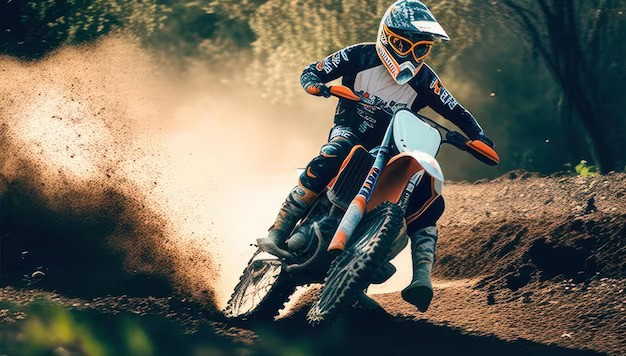

In [24]:
Image.open(IMG_PATH)

In [25]:
img = Image.open(IMG_PATH)

In [26]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [27]:
img.size # W x H

(626, 356)

In [28]:
arr_img = np.array(img)
arr_img.shape # H x W x C

(356, 626, 3)

In [29]:
arr_img.min(), arr_img.max()

(0, 255)

In [30]:
mean_red = arr_img[:, :, 0].mean()  # Red channel
mean_green = arr_img[:, :, 1].mean()  # Green channel
mean_blue = arr_img[:, :, 2].mean()  # Blue channel

In [34]:
arr_img.shape

(356, 626, 3)

In [31]:
img_scaled = arr_img / 255.0  # Scale pixel values to [0, 1]
mean_per_channel = np.mean(img_scaled, axis=(0, 1))
std_per_channel = np.std(img_scaled, axis=(0, 1))

In [32]:
img_tensor = transforms.ToTensor()(img)  # Shape: (C, H, W)

normalize = transforms.Normalize(mean=mean_per_channel.tolist(), std=std_per_channel.tolist())
normalized_img = normalize(img_tensor)

In [33]:
mean_after = torch.mean(normalized_img, dim=(1, 2))
std_after = torch.std(normalized_img, dim=(1, 2))

print("Mean after normalization:", mean_after)
print("Std after normalization:", std_after)

Mean after normalization: tensor([-1.4002e-08,  2.8346e-08,  6.4430e-08])
Std after normalization: tensor([1.0000, 1.0000, 1.0000])


## 2. Augmentation
Augmentation is used to artificially increase the size of the training dataset by applying transformations like rotation, flipping, cropping, etc. This improves generalization.

In [35]:
augment = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.ToTensor()
])

In [36]:
augmented_image = augment(img)

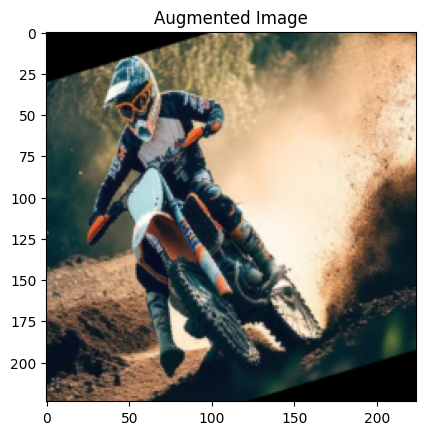

In [37]:
augmented_image_pil = transforms.ToPILImage()(augmented_image)
plt.imshow(augmented_image_pil)
plt.title('Augmented Image')
plt.show()

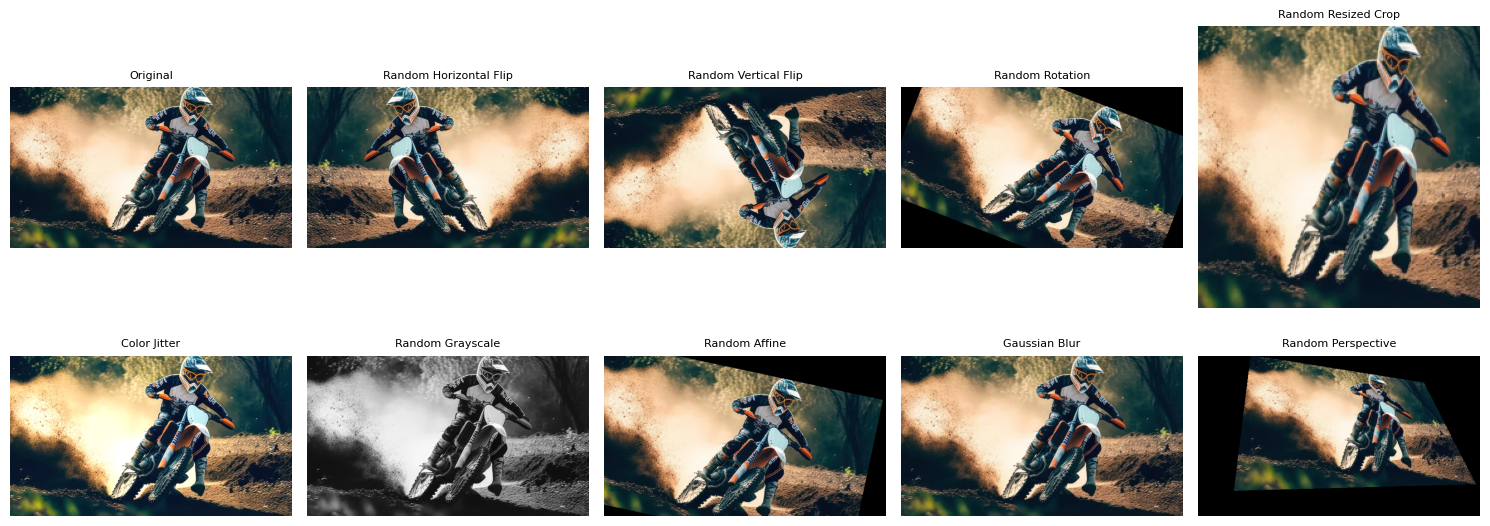

In [38]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load an example image
image_path = "dirtbike.jpg"  # Replace with your image path
image = Image.open(image_path)

# Define individual transformations
transformations = {
    "Original": transforms.Compose([]),
    "Random Horizontal Flip": transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0)
    ]),
    "Random Vertical Flip": transforms.Compose([
        transforms.RandomVerticalFlip(p=1.0)
    ]),
    "Random Rotation": transforms.Compose([
        transforms.RandomRotation(degrees=30)
    ]),
    "Random Resized Crop": transforms.Compose([
        transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0))
    ]),
    "Color Jitter": transforms.Compose([
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
    ]),
    "Random Grayscale": transforms.Compose([
        transforms.RandomGrayscale(p=1.0)
    ]),
    "Random Affine": transforms.Compose([
        transforms.RandomAffine(degrees=15, translate=(0.1, 0.1))
    ]),
    "Gaussian Blur": transforms.Compose([
        transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ]),
    "Random Perspective": transforms.Compose([
        transforms.RandomPerspective(distortion_scale=0.5, p=1.0)
    ])
}

# Apply and visualize each transformation
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for ax, (name, transform) in zip(axes, transformations.items()):
    transformed_image = transform(image)
    ax.imshow(transformed_image)
    ax.set_title(name, fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()
